In [1]:
!pip install -q -U transformers accelerate flash_attn einops timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


**transformers:** HuggingFace’s Transformers library provides various deep learning models for different tasks that you can download.

**accelerate:** HuggingFace’s Accelerate library improves model inference time when serving models through a GPU.

**flash_attn:** The Flash Attention library implements a faster attention algorithm than the original, and it is used in the Florence-2 model.

**einops: **Einstein Operations simplifies representing matrix multiplications and is implemented in the Florence-2 model

**Downloading Florence-2 Model**

In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM

model_id = 'microsoft/Florence-2-large-ft'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True, device_map="cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

**What is an AutoProcessor?**

In the context of Hugging Face's transformers library, an AutoProcessor is a class that combines the functionalities of a feature extractor (like an image processor) and a tokenizer (like a text processor) into a single, unified object.

It simplifies the preprocessing pipeline for multimodal models (those that handle both images and text) by providing a single interface to prepare both types of inputs for the model.

*Why is it used with Vision Transformers?*

Vision Transformers (ViTs) often require two types of preprocessing:

Image Processing: Resizing, normalization, and converting images into patches or sequences of pixel values.

Text Processing: Tokenizing text prompts or captions into numerical representations.

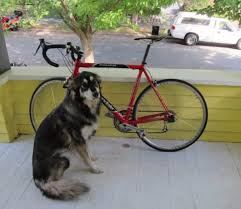

In [37]:
from PIL import Image
image = Image.open('/content/download (1).jfif')
display(image)

**Generating Caption**

In [38]:
PROMPT = "<CAPTION>"
inputs = processor(text=PROMPT, images=image, return_tensors="pt").to("cuda")
#print(inputs)
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    do_sample=False,
)
text_generations = processor.batch_decode(generated_ids,
skip_special_tokens=False)[0]

result = processor.post_process_generation(text_generations,
task=PROMPT, image_size=(image.width, image.height))

print(result[PROMPT])

A dog is sitting next to a bike.


We begin by creating the prompt.

Then, we give both the prompt and image to the processor class and return the PyTorch sensors. We give them to the GPU because the model resides in the GPU and stores it in the variable inputs.

The inputs variable contains the input_ids, i.e. the token ids, and the pixel values for the image.

Then we call the model’s generate function and give the input ids, the image pixel values. We set the maximum generated tokens to 512 keep the sampling to False and store the generated tokens in the generated_ids.

Then we call the .batch_decode function of the processor give it the generated_ids and set the skip_special_tokens flag to False. This will be a list and hence we need the first element of the list.

Finally, we post-process the generated text by calling the .post_process_generated and giving it the generated text, the task type, and the image_size as a tuple.

**Providing Prompts**

In [39]:
PROMPT = "<DETAILED_CAPTION>"
inputs = processor(text=PROMPT, images=image, return_tensors="pt").to("cuda")
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    do_sample=False,
)
text_generations = processor.batch_decode(generated_ids,
skip_special_tokens=False)[0]

result = processor.post_process_generation(text_generations,
task=PROMPT, image_size=(image.width, image.height))

print(result[PROMPT])

In this image we can see a dog sitting on the floor. We can also see a bicycle, a car on the road, a group of trees and some plants.


**More Detailed Caption**

In [40]:
PROMPT = "<MORE_DETAILED_CAPTION>"

inputs = processor(text=PROMPT, images=image, return_tensors="pt").to("cuda")

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    do_sample=False,
)


text_generations = processor.batch_decode(generated_ids,
skip_special_tokens=False)[0]

result = processor.post_process_generation(text_generations,
task=PROMPT, image_size=(image.width, image.height))

print(result[PROMPT])

A dog is sitting next to a bike. The bike is red and has black handles. The dog is black and white and has long fur. There is a white van parked on the street behind the dog. 


**Object Detection with Florence-2**

Object Detection is one of the well-known tasks in Computer Vision. It deals with finding some object given an image. In Object Detection, the model identifies the image and provides the X and Y coordinates of the bounding boxes around the object. The Florence-2 Vision Language Model is very much capable of detecting objects given an image.

In [41]:
PROMPT = "<OD>"

inputs = processor(text=PROMPT, images=image, return_tensors="pt").to("cuda")

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    do_sample=False,
)
text_generations = processor.batch_decode(generated_ids,
skip_special_tokens=False)[0]

results = processor.post_process_generation(text_generations,
task=PROMPT, image_size=(image.width, image.height))


The process for the Object Detection is very similar to the Image Captioning task that we have just done. The only difference here is that we change the Prompt to <OD> meaning object detection. So we give this Prompt along with the image to the processor object and obtain the tokenized inputs. Then we give these tokenized inputs with the image pixel values to the Florence-2 Vision Language Model to generate the output. Then decode this output.

The output is stored in the variable named results. The variable results is of the format {”: { ‘bboxes’: [[x1, y1, x2, y2], …], ‘labels’: [‘label1’, ‘label2’, …] } }. So the Florence-2 Vision Model outputs the bounding box, X, Y coordinates for each label, that is for each object that it detects in the image.

# Drawing Bounding Boxes on the Image

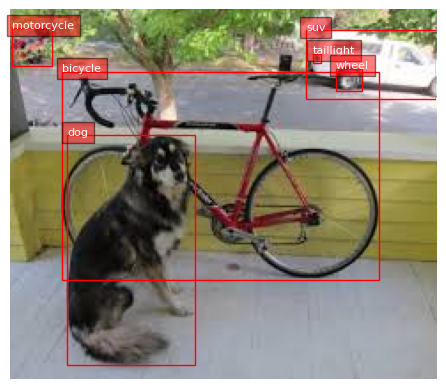

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(image)
for bbox, label in zip(results[PROMPT]['bboxes'], results[PROMPT]['labels']):
    x1, y1, x2, y2 = bbox
    rect_box = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,
    edgecolor='r', facecolor='none')
    ax.add_patch(rect_box)
    plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))
ax.axis('off')
plt.show()

**Caption to Phrase Grounding**

In [46]:
PROMPT = "<CAPTION_TO_PHRASE_GROUNDING> show bike and wheel"
task_type = "<CAPTION_TO_PHRASE_GROUNDING>"
inputs = processor(text=PROMPT, images=image, return_tensors="pt").to("cuda")
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    do_sample=False,
)
text_generations = processor.batch_decode(generated_ids,
skip_special_tokens=False)[0]
results = processor.post_process_generation(text_generations,
task=task_type, image_size=(image.width, image.height))


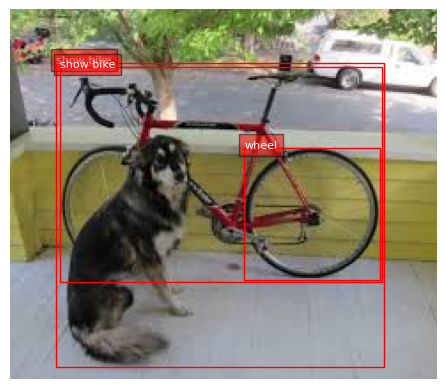

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(image)
for bbox, label in zip(results[task_type]['bboxes'], results[task_type]['labels']):
    x1, y1, x2, y2 = bbox
    rect_box = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,
    edgecolor='r', facecolor='none')
    ax.add_patch(rect_box)
    plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))
ax.axis('off')
plt.show()

# Segmentation with Florence-2

In [48]:
PROMPT = "<REFERRING_EXPRESSION_SEGMENTATION>Red bike not cycle"
task_type = "<REFERRING_EXPRESSION_SEGMENTATION>"
inputs = processor(text=PROMPT, images=image, return_tensors="pt").to("cuda")
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    do_sample=False,
)
text_generations = processor.batch_decode(generated_ids,
skip_special_tokens=False)[0]

results = processor.post_process_generation(text_generations,
task=task_type, image_size=(image.width, image.height))


Here, the process is similar to the Image Captioning and the Object Detection Tasks. We start by providing the Prompt.

Here the Prompt is “<REFERRING_EXPRESSION_SEGMENTATION>two black tires” where the task is segmentation.

The segmentation will be based on the text input provided, here it is “two black tires”.

So the Florence-2 model will try to generate masks that are closely related to this text input and the image provided.

Here the results variable will be of the format {”: {‘Polygons’: [[[polygon]], …], ‘labels’: [”, ”, …]}} where each object/mask is represented by a list of polygons. And each polygon is of the form [x1,y1,x2,y2,…xn,yn].

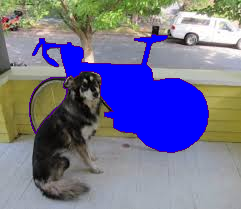

In [49]:
import copy
import numpy as np
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont

output_image = copy.deepcopy(image)
res = results[task_type]
draw = ImageDraw.Draw(output_image)
scale = 1
for polygons, label in zip(res['polygons'], res['labels']):
    fill_color = "blue"
    for _polygon in polygons:
        _polygon = np.array(_polygon).reshape(-1, 2)
        if len(_polygon) < 3:
            print('Invalid polygon:', _polygon)
            continue
        _polygon = (_polygon * scale).reshape(-1).tolist()
        draw.polygon(_polygon, outline="indigo", fill=fill_color)
        draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill="indigo")
display(output_image)

**Explanation**

Here, we start by importing various tools from the PIL library for image processing.

We create a deep copy of our image and store the value of the key “<REFERRING_EXPRESSION_SEGMENTATION>” in a new variable.

Next, we load the image by creating an ImageDraw instance by calling the.Draw() method and giving the copy of the actual image.
Next, we iterate through the zip of polygons and the label values.
For each polygon, we then iterate through the individual polygon with the name _polygon and reshape it. The _polygon is now a high-dimensional list.

We know that a _polygon must have at least 3 sides so it can be connected. So we check for this validity condition, to see that the _polygon list has at least 3 list items.

Finally, we draw this _polygon on the copy of the actual image by calling the .polygon() method and giving it the _polygon. Along with that we even give it the outline color and the fill color.

If the Florence-2 Vision Language Model generates a label for those polygons, then we can even draw this text on the copy of the actual image by calling the .text() function and giving it the label.
Finally, after drawing all the polygons that are generated by the Florence-2 model, we output the image by calling the display function from the IPython library.

The Florence-2 Vision Language Model successfully understood our query of “two black tires” and inferred that the image contained a vehicle with visible black tires. The model generated polygon representations for these tires, which were masked with a blue color. The model excelled in diverse computer vision tasks due to the strong training data curated by the Microsoft Team.

# Florence-2 model support the following tasks:

In [50]:
import pandas as pd

data = {
    'Task Category': ['Image Captioning', 'Image Captioning', 'Image Captioning', 'Image Captioning', 'Image Captioning', 'Object Detection', 'Object Detection', 'Object Detection', 'Object Detection', 'Object Detection', 'Segmentation', 'Segmentation', 'OCR', 'OCR'],
    'Task Prompt': ['<CAPTION>', '<DETAILED_CAPTION>', '<MORE_DETAILED_CAPTION>', '<REGION_TO_CATEGORY>', '<REGION_TO_DESCRIPTION>', '<OD>', '<DENSE_REGION_CAPTION>', '<CAPTION_TO_PHRASE_GROUNDING>', '<OPEN_VOCABULARY_DETECTION>', '<REGION_PROPOSAL>', '<REFERRING_EXPRESSION_SEGMENTATION>', '<REGION_TO_SEGMENTATION>', '<OCR>', '<OCR_WITH_REGION>'],
    'Inputs': ['Image', 'Image', 'Image', 'Image, Bounding box', 'Image, Bounding box', 'Image', 'Image', 'Image, Text', 'Image, Text', 'Image', 'Image, Text', 'Image, Bounding box', 'Image', 'Image'],
    'Outputs': ['Text', 'Text', 'Text', 'Text', 'Text', 'Bounding boxes, Text', 'Bounding boxes, Text', 'Bounding boxes, Text', 'Bounding boxes, Text', 'Bounding boxes', 'Polygon', 'Polygon', 'Text', 'Text, Bounding boxes']
}


df = pd.DataFrame(data)

# Reorder columns
cols = ['Task Category', 'Task Prompt', 'Inputs', 'Outputs', 'Description']
df = df[['Task Category', 'Task Prompt', 'Inputs', 'Outputs']]
#Since Description column data is not given in prompt so i am ignoring it.
#If u still want it you can add a new column called description with some default value using below code
#df['Description'] = 'Default Value' # Replace with your desired default value if any
#df = df[cols]


# Display table
print(df.to_string())

       Task Category                          Task Prompt               Inputs               Outputs
0   Image Captioning                            <CAPTION>                Image                  Text
1   Image Captioning                   <DETAILED_CAPTION>                Image                  Text
2   Image Captioning              <MORE_DETAILED_CAPTION>                Image                  Text
3   Image Captioning                 <REGION_TO_CATEGORY>  Image, Bounding box                  Text
4   Image Captioning              <REGION_TO_DESCRIPTION>  Image, Bounding box                  Text
5   Object Detection                                 <OD>                Image  Bounding boxes, Text
6   Object Detection               <DENSE_REGION_CAPTION>                Image  Bounding boxes, Text
7   Object Detection        <CAPTION_TO_PHRASE_GROUNDING>          Image, Text  Bounding boxes, Text
8   Object Detection          <OPEN_VOCABULARY_DETECTION>          Image, Text  Bounding bo